In [1]:
# Bloque de importación
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split

In [2]:
# Lectura del dataset
df = pd.read_csv('data.csv')

In [3]:
# Revisar si el dataset tiene datos "null" y dropear filas duplicadas
df.drop_duplicates(inplace = True)
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
# Se saca la info de las variables para ajustarlas en caso de ser necesario
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [5]:
# Se revisan todas las variables categóricas para mappear los datos para ser usados por el modelo ML
# Diccionario de datos: SE = Senior,  MI = Mid level,  EN = Entry level,  EX = Executive level
df['experience_level'].value_counts()
# Se observan 3 datos de acá

SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64

In [6]:
# Diccionario de datos: FT = Full Time,  PT = Part Time,   CT = Contractual,   FL = Freelance
df['employment_type'].value_counts()

FT    2547
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [7]:
df['job_title'].value_counts()

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64

In [8]:
df['salary_currency'].value_counts()

USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [9]:
df['employee_residence'].value_counts()

US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [10]:
df['company_location'].value_counts()

US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [11]:
# Diccionario de datos: M: Medium, L: Large, S: Small
df['company_size'].value_counts()

M    2028
L     409
S     147
Name: company_size, dtype: int64

In [12]:
# Se hace un EDA para ver los datos
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Text(0.5, 1.0, 'Valores atípicos')

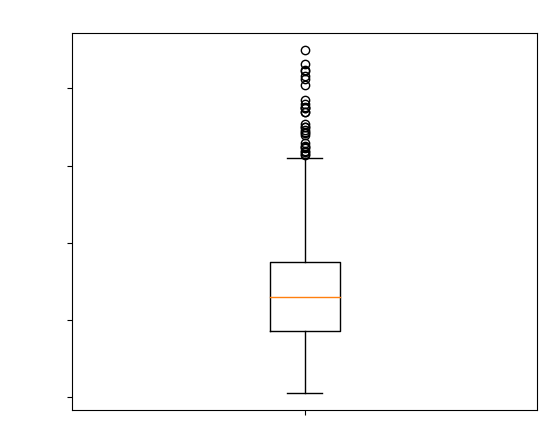

In [40]:
plt.figure(figsize=(6,5),dpi=100)
plt.boxplot(df['salary_in_usd'],labels=['salary_in_usd'])
labelsx = plt.xticks()[1]
labelsy = plt.yticks()[1]

for label in labelsx:
    label.set_color('white')

for labely in labelsy:
    labely.set_color('white')
plt.title('Valores atípicos', color = 'white')

Text(0, 0.5, 'a')

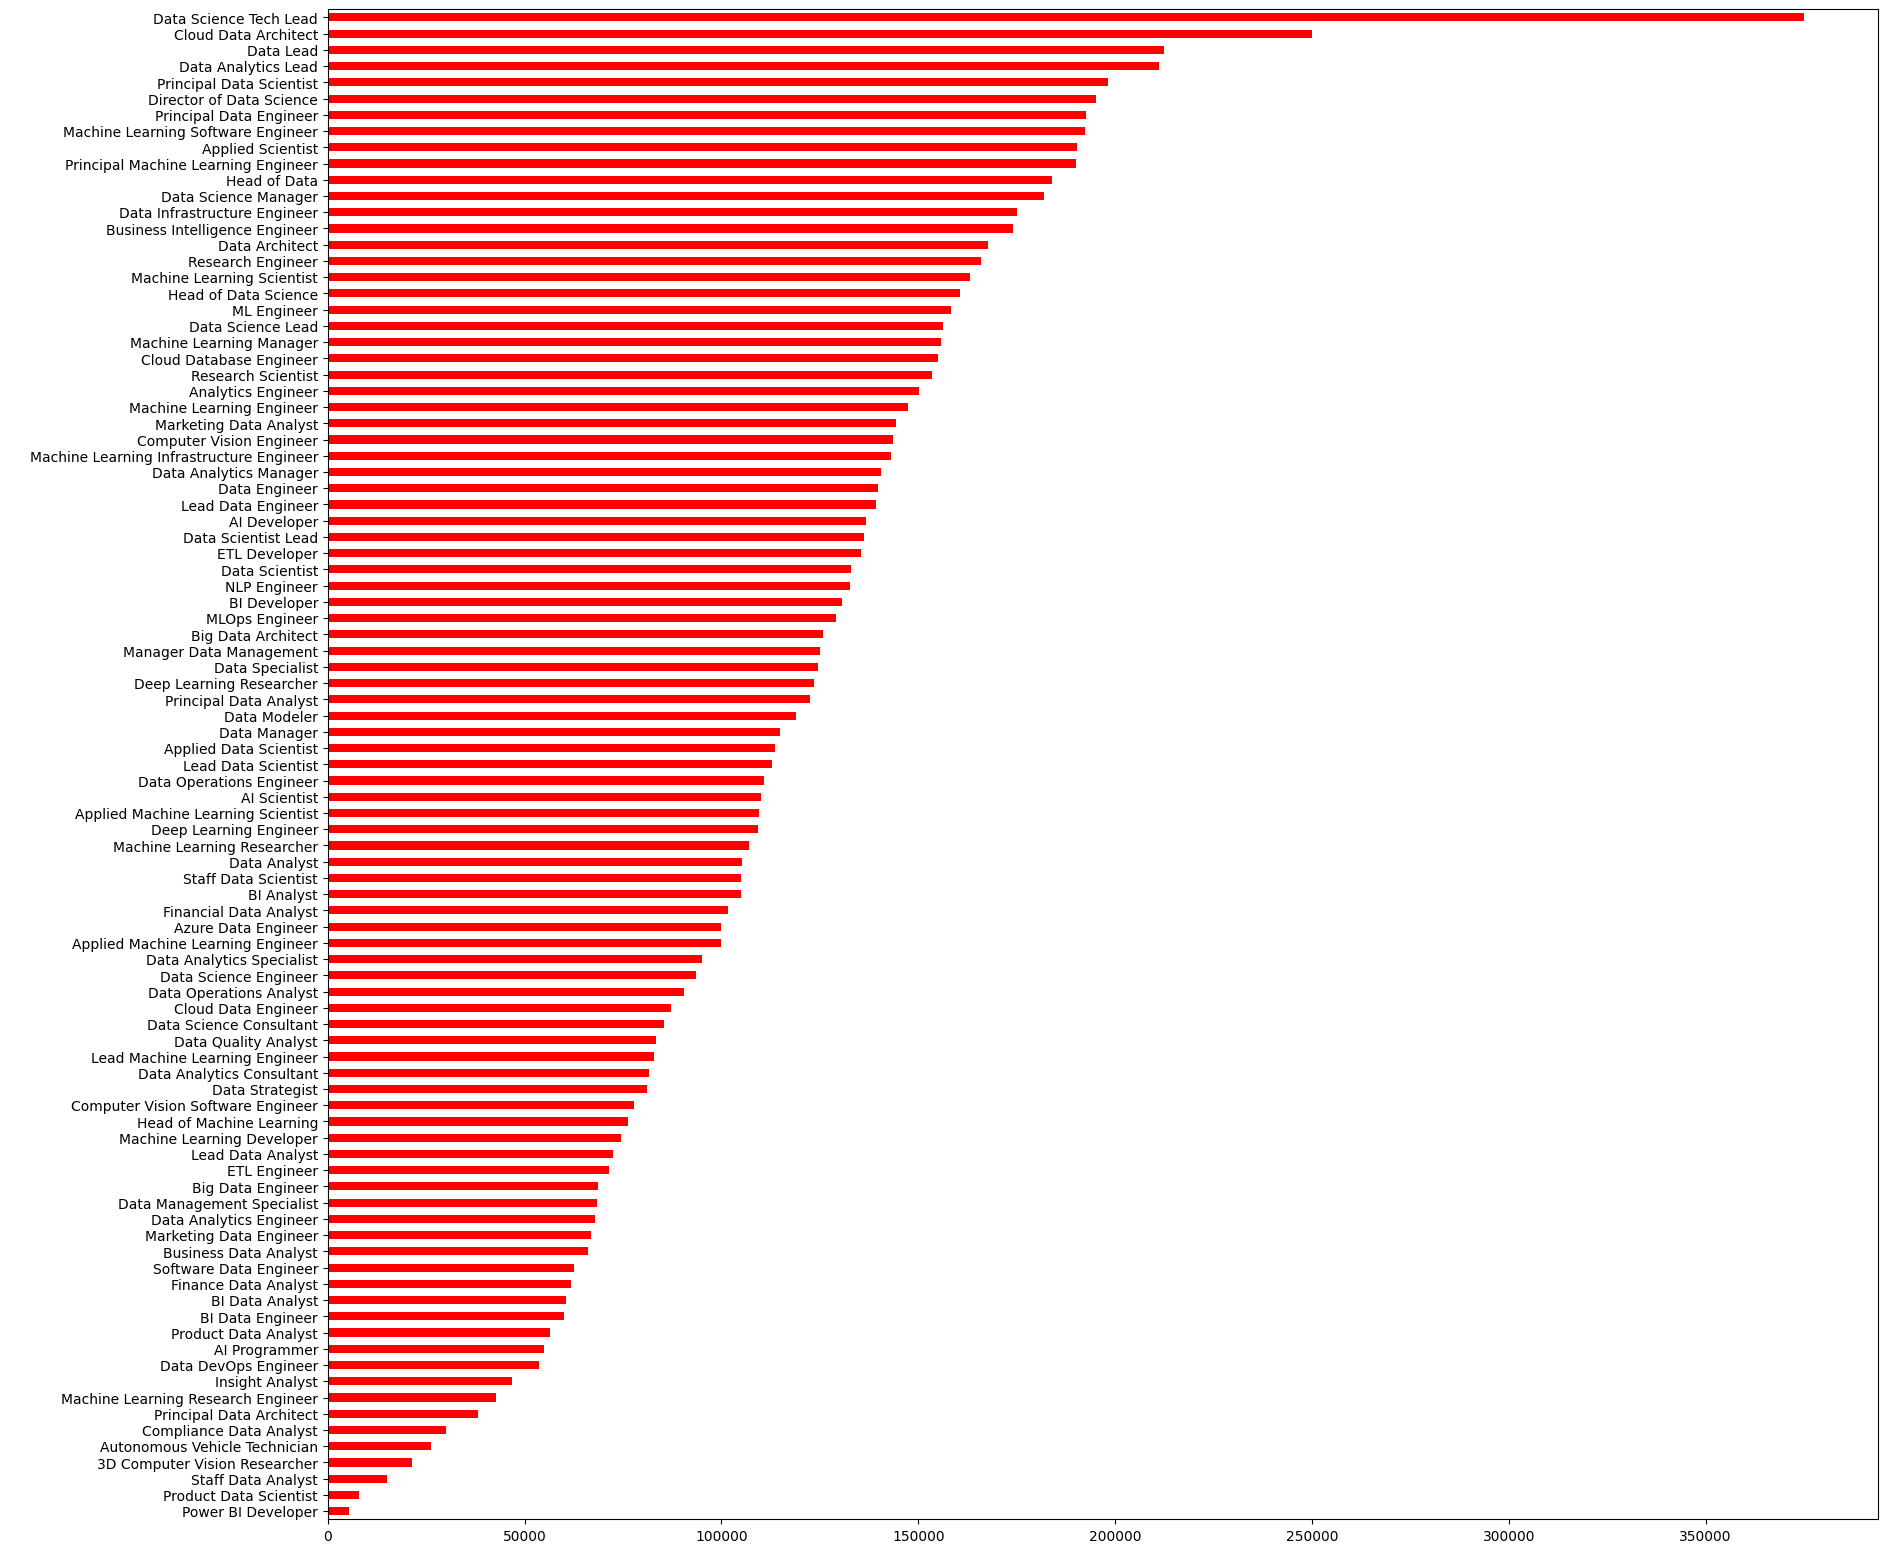

In [48]:
# Ver los sueldos por título profesional
plt.figure(figsize = (20,20), dpi = 100)
df.groupby('job_title').mean()['salary_in_usd'].sort_values().plot(kind = 'barh', color = 'red')


<AxesSubplot:ylabel='experience_level'>

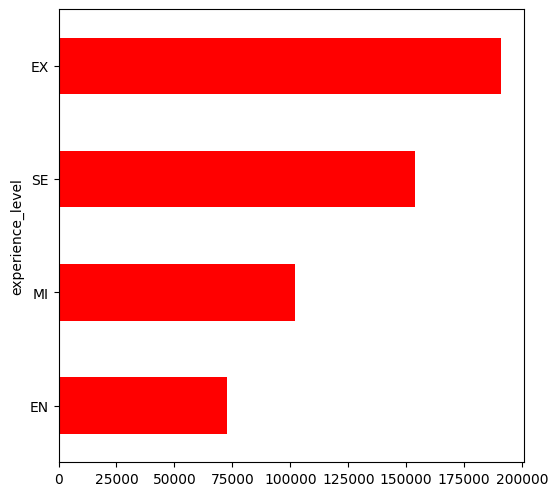

In [51]:
# Por nivel de experiencia
plt.figure(figsize = (6,6), dpi = 100)
df.groupby('experience_level').mean()['salary_in_usd'].sort_values().plot(kind = 'barh', color = 'red')

Text(0.5, 1.0, 'Media de sueldos desde el 2020 hasta el 2023')

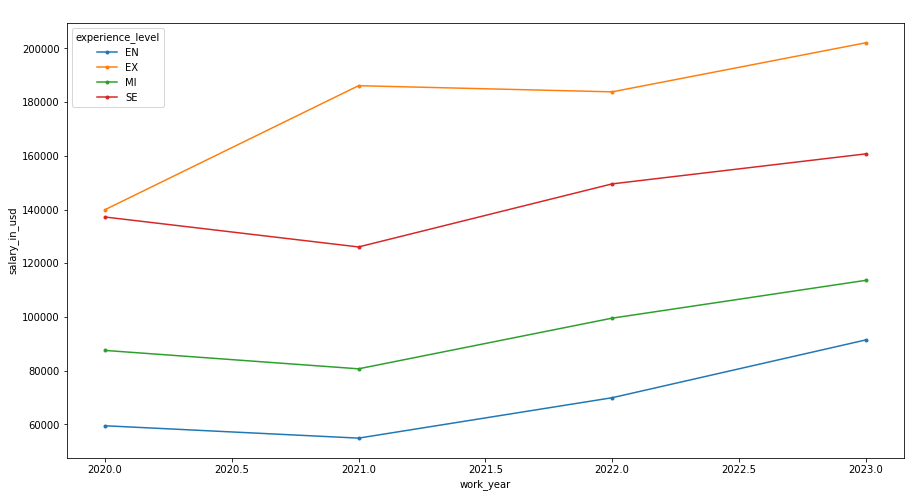

In [58]:
# Ver sueldos a través de los años según el nivel de experiencia
fig, ax = plt.subplots(figsize=(15,8))
df.groupby(['work_year','experience_level']).mean()['salary_in_usd'].unstack().plot(ax=ax,marker='.')
plt.ylabel('salary_in_usd')
plt.title('Media de sueldos desde el 2020 hasta el 2023', color = 'white')

In [75]:
# Aprendiendo a usar pivot tables
# Se muestra el salario a través de los años la media por nivel de experiencia
df.pivot_table(values=['salary_in_usd'],columns='work_year',index='experience_level', aggfunc= 'mean', sort=True)


salary_in_usd                                             
work_year                  2020           2021           2022           2023
experience_level                                                            
EN                 59512.454545   54905.254545   69949.945455   91464.915663
EX                139944.333333  186128.000000  183837.743590  202107.340909
MI                 87564.718750   80711.377778   99578.621528  113659.740157
SE                137240.500000  126085.356164  149572.658430  160743.310968

In [77]:
# Acá se ven los salarios a través de los años por nivel de experiencia y tamaño de la empresa
df.pivot_table(values=['salary_in_usd'],columns='work_year',index=['experience_level', 'company_size'], aggfunc= 'mean', sort=True)

salary_in_usd                                \
work_year                               2020           2021           2022   
experience_level company_size                                                
EN               L              86654.375000   57001.500000   71817.023256   
                 M              22810.666667   42646.411765   72700.156863   
                 S              49782.454545   65047.937500   56165.875000   
EX               L             202416.500000  193418.833333  116875.000000   
                 M              15000.000000  107513.000000  196335.833333   
                 S                       NaN  242870.500000  173805.500000   
MI               L              77648.294118   95458.981132   90283.857143   
                 M             130567.333333   67278.714286  104650.819383   
                 S              51157.333333   49490.312500   59525.526316   
SE               L             157633.000000  132850.863636  153170.162791   
                 M             149161.666667  113566.375000  150172.568027   
                 S             114926.625000  118594.692308  102277.500000   

                                              
work_year                               2023  
experience_level company_size                 
EN               L              80276.869565  
                 M              98802.444444  
                 S              68314.666667  
EX               L                       NaN  
                 M             202107.340909  
                 S                       NaN  
MI               L              74109.250000  
                 M             118456.362832  
                 S              77031.375000  
SE               L             177202.258065  
                 M             160842.635870  
                 S              87827.000000

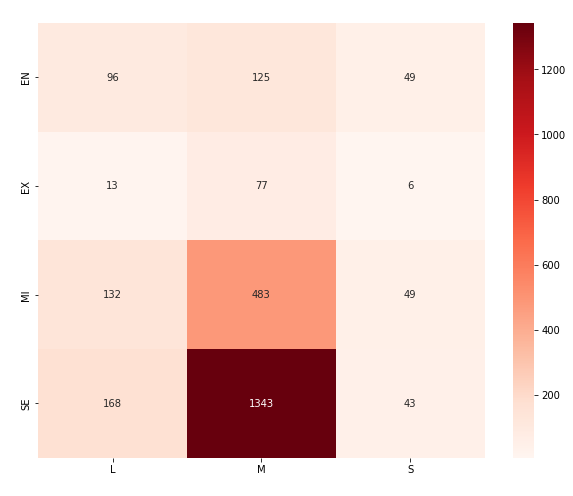

In [61]:
cross_tab = pd.crosstab(df['experience_level'], df['company_size'])

# Create a heatmap using the cross-tabulation data
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='Reds')

plt.xlabel('Company Size', color = 'white')
plt.ylabel('Experience Level', color = 'white')
plt.title('Relationship between Experience Level and Company Size', color = 'white')

plt.show()

In [13]:
# Se hacen los mapeos de las variables correspondientes
labelEncoder = pp.LabelEncoder()

# Se separa en un dfPred para ver el tema de MachineLearning y se dejan los valores originales en df para hacer un análisis de datos.
dfPred = df.copy()

# Se dropean columnas irrelevantes para la predicción
dfPred.drop('work_year', axis = 1, inplace = True)
dfPred.drop('salary_currency', axis = 1, inplace = True)
dfPred.drop('employee_residence', axis = 1, inplace = True)

dfPred['experience_level'] = labelEncoder.fit_transform(dfPred['experience_level'])
dfPred['employment_type'] = labelEncoder.fit_transform(dfPred['employment_type'])
dfPred['job_title'] = labelEncoder.fit_transform(dfPred['job_title'])   
#dfPred['employee_residence'] = labelEncoder.fit_transform(dfPred['employee_residence'])
dfPred['company_location'] = labelEncoder.fit_transform(dfPred['employment_type'])
dfPred['company_size'] = labelEncoder.fit_transform(dfPred['employment_type'])

In [14]:
# Ahora con todas las columnas transformadas, se puede hacer un modelo de predicción
dfPred.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   experience_level  2584 non-null   int32
 1   employment_type   2584 non-null   int32
 2   job_title         2584 non-null   int32
 3   salary            2584 non-null   int64
 4   salary_in_usd     2584 non-null   int64
 5   remote_ratio      2584 non-null   int64
 6   company_location  2584 non-null   int64
 7   company_size      2584 non-null   int64
dtypes: int32(3), int64(5)
memory usage: 151.4 KB


In [15]:
# Se procede a ver los principales predictores mediante RFE.
estimador = LinearRegression()

# Se cambia la variable objetivo (salario), al final del dataframe para obtenerla de manera más fácil.
columnas = dfPred.columns.tolist()
posSalary = columnas.index('salary')
columnas[posSalary], columnas[-1] = columnas[-1], columnas[posSalary]
dfPred = dfPred[columnas]

# Se crea el RFE y se aplica al dataset para ver las variables mejores predictoras.
rfe = RFE(estimator = estimador, n_features_to_select = 3)
X = dfPred.iloc[:,:-1]
y = dfPred.iloc[:,-1]

# Se aplica RFE
rfe.fit_transform(X,y)
predictores = rfe.support_
rankingPredictores = rfe.ranking_
predictoresPos = []
i = 0

while i < len(predictores):
    if predictores[i] == True:
        predictoresPos.append(i)
    i += 1
        
predictoresSeleccionados = dfPred.columns[predictoresPos]
print(predictoresSeleccionados)

# Se eliminan las columnas que no corresponden a los predictores seleccionados.

# Se deja un df con todas las variables para ver la diferencia de solo con los predictores y todas las variables.
dfPredTodasLasVariables = dfPred.copy()
columnasDelete = list(set(dfPred.columns) - set(predictoresSeleccionados))

# Se deja la variable target
columnasDelete.remove('salary')

dfPred.drop(columnasDelete, axis = 1, inplace = True)
# En base a esto se pueden ver cuáles son las variables que más influyen en el salario de las personas y así descartar algunas que no tienen peso alguno en la predicción.


Index(['employment_type', 'company_size', 'company_location'], dtype='object')


In [16]:
# Van todas las variables para predecir si se tiene diabetes o no
x1 = dfPred.iloc[:,:-1].values
x2 = dfPredTodasLasVariables.iloc[:,:-1].values
# Target
y1 = dfPred.iloc[:,-1].values
y2 = dfPredTodasLasVariables.iloc[:,-1].values

# Se separan los datos en 80% para entrenamiento y 20% para evaluación
x_train, x_test, y_train, y_test = train_test_split(x1, y1, train_size=0.8, random_state=42)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x2, y2, train_size=0.8, random_state=42)

# Se realiza el featuring scaling para normalizar los datos
norm = pp.StandardScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

x_train1 = norm.fit_transform(x_train1)
x_test1 = norm.transform(x_test1)

In [17]:
# Se crea un modelo para estimar el salario de las personas con todas las variables del dataset.
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.009671179883945842


In [18]:
forest1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest1.fit(x_train1, y_train1)
y_pred1 = forest1.predict(x_test1)
print(accuracy_score(y_test1, y_pred1))

0.23597678916827852


In [19]:
# Se revisan algunos métodos predictivos
# KNeighborsClassifier (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.0019342359767891683


In [20]:
# SVM Lineal (Linear SVM)
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.02321083172147002


In [21]:
# Árbol de clasificación (DecisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.02321083172147002


In [22]:
# Árbol de clasificación (DecisionTreeClassifier)
# Con los predictores seleccionados se ve mucho mayor porcentaje de predicción para el árbol (Se puede deber a la poca cantidad de datos)
tree1 = DecisionTreeClassifier()
tree1.fit(x_train1, y_train1)
y_pred = tree1.predict(x_test1)
print(accuracy_score(y_test1, y_pred))

0.6266924564796905
